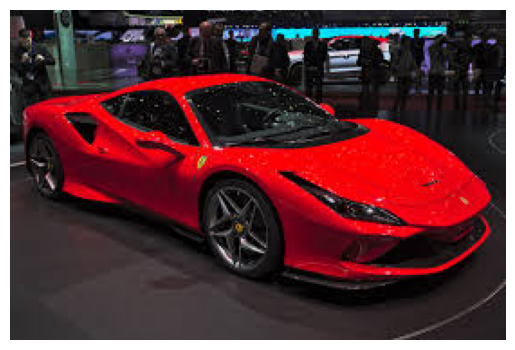

In [1]:
import cv2
import matplotlib.pyplot as plt
image=cv2.imread('ferrari.jpg')
image=cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(image)
plt.axis('off')  # Hide axes
plt.show()


In [2]:
image.shape

(183, 275, 3)

## Converting to Gray Scale

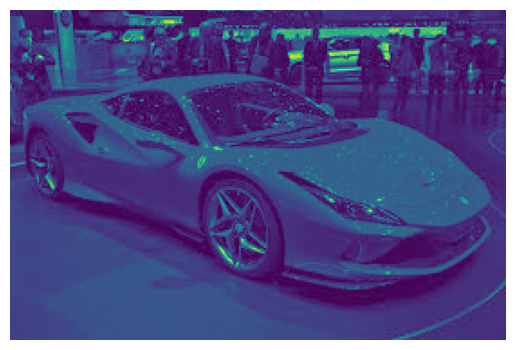

In [3]:
image=cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
plt.imshow(image)
plt.axis('off')  # Hide axes
plt.show()

## Applying Gaussian + Salt & Pepper Noise

In [4]:
import numpy as np
# Function to add Gaussian noise
def add_gaussian_noise(img, mean=0, sigma=25):
    gauss = np.random.normal(mean, sigma, img.shape).astype(np.float32)  # Use float32 to prevent overflow
    noisy_img = img.astype(np.float32) + gauss  # Add noise
    noisy_img = np.clip(noisy_img, 0, 255)  # Ensure pixel values stay in range
    return noisy_img.astype(np.uint8)  # Convert back to uint8

# Function to add Salt & Pepper noise
def add_salt_pepper_noise(img, salt_prob=0.02, pepper_prob=0.02):
    noisy_img = img.copy()
    total_pixels = img.size

    # Salt noise (white pixels)
    num_salt = int(total_pixels * salt_prob)
    coords = [np.random.randint(0, i - 1, num_salt) for i in img.shape]
    noisy_img[coords[0], coords[1]] = 255

    # Pepper noise (black pixels)
    num_pepper = int(total_pixels * pepper_prob)
    coords = [np.random.randint(0, i - 1, num_pepper) for i in img.shape]
    noisy_img[coords[0], coords[1]] = 0

    return noisy_img


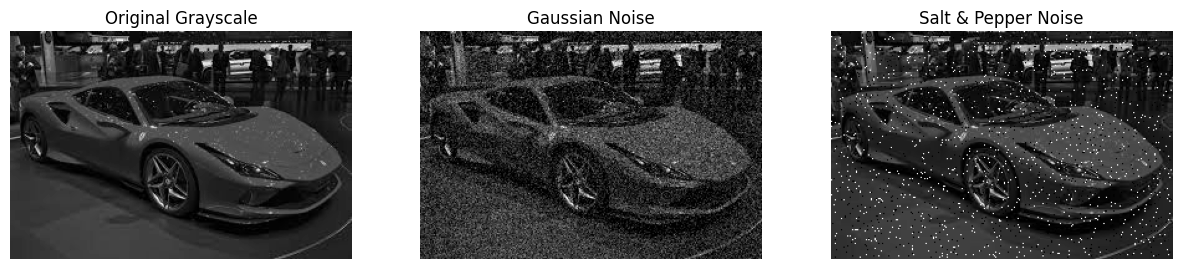

In [5]:
# Apply noises
gaussian_noisy_image = add_gaussian_noise(image)
salt_pepper_noisy_image = add_salt_pepper_noise(image)

# Display images
fig, ax = plt.subplots(1, 3, figsize=(15, 5))
ax[0].imshow(image, cmap='gray')
ax[0].set_title('Original Grayscale')
ax[0].axis('off')

ax[1].imshow(gaussian_noisy_image, cmap='gray')
ax[1].set_title('Gaussian Noise')
ax[1].axis('off')

ax[2].imshow(salt_pepper_noisy_image, cmap='gray')
ax[2].set_title('Salt & Pepper Noise')
ax[2].axis('off')

plt.show()

#### i) Gaussian Noisy Image

#### Mean Filter

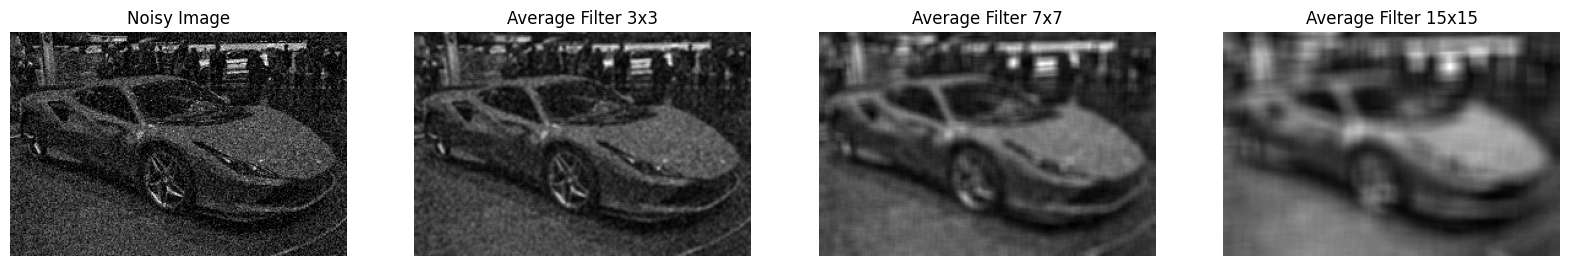

In [6]:
# Apply Average (Mean) filters with different kernel sizes
filtered_3x3 = cv2.blur(gaussian_noisy_image, (3, 3))
filtered_7x7 = cv2.blur(gaussian_noisy_image, (7, 7))
filtered_15x15 = cv2.blur(gaussian_noisy_image, (15, 15))

# Display images
fig, ax = plt.subplots(1, 4, figsize=(20, 5))

ax[0].imshow(gaussian_noisy_image, cmap='gray')
ax[0].set_title('Noisy Image')
ax[0].axis('off')

ax[1].imshow(filtered_3x3, cmap='gray')
ax[1].set_title('Average Filter 3x3')
ax[1].axis('off')

ax[2].imshow(filtered_7x7, cmap='gray')
ax[2].set_title('Average Filter 7x7')
ax[2].axis('off')

ax[3].imshow(filtered_15x15, cmap='gray')
ax[3].set_title('Average Filter 15x15')
ax[3].axis('off')

plt.show()


#### Median Filter

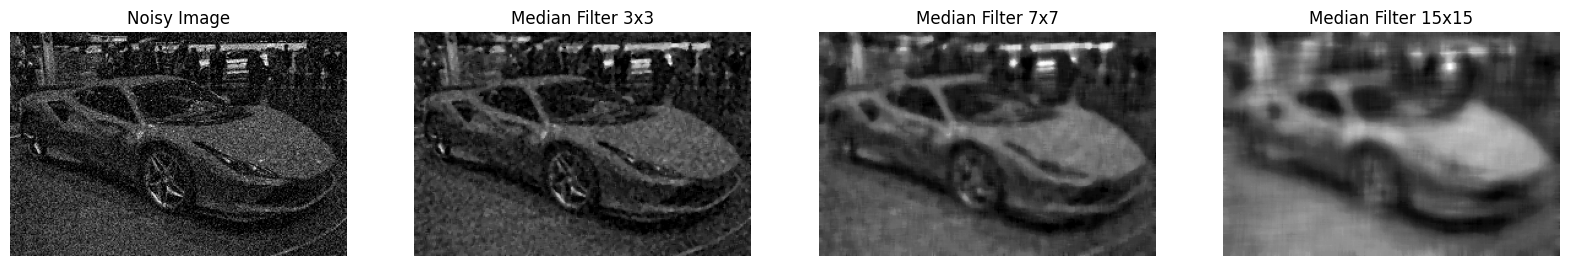

In [7]:
# Apply Median Filters with different kernel sizes
filtered_median_3x3 = cv2.medianBlur(gaussian_noisy_image, 3)
filtered_median_7x7 = cv2.medianBlur(gaussian_noisy_image, 7)
filtered_median_15x15 = cv2.medianBlur(gaussian_noisy_image, 15)

# Display images
fig, ax = plt.subplots(1, 4, figsize=(20, 5))

ax[0].imshow(gaussian_noisy_image, cmap='gray')
ax[0].set_title('Noisy Image')
ax[0].axis('off')

ax[1].imshow(filtered_median_3x3, cmap='gray')
ax[1].set_title('Median Filter 3x3')
ax[1].axis('off')

ax[2].imshow(filtered_median_7x7, cmap='gray')
ax[2].set_title('Median Filter 7x7')
ax[2].axis('off')

ax[3].imshow(filtered_median_15x15, cmap='gray')
ax[3].set_title('Median Filter 15x15')
ax[3].axis('off')

plt.show()

#### Adaptive Median filter

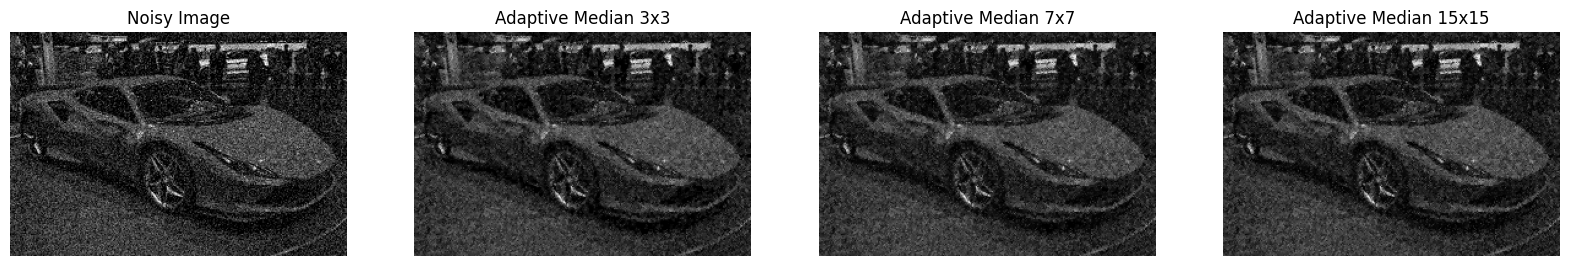

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def adaptive_median_filter(image, max_window_size=15):
    """
    Apply Adaptive Median Filter to an image.
    
    Parameters:
        image (numpy array): Grayscale input image.
        max_window_size (int): Maximum allowed window size (must be odd).
    
    Returns:
        numpy array: Filtered image.
    """
    padded_image = np.pad(image, max_window_size//2, mode='reflect')
    filtered_image = np.copy(image)
    
    rows, cols = image.shape
    
    for i in range(rows):
        for j in range(cols):
            window_size = 3  # Start with a small window
            
            while window_size <= max_window_size:
                x, y = i + max_window_size//2, j + max_window_size//2
                window = padded_image[x-window_size//2:x+window_size//2+1, y-window_size//2:y+window_size//2+1]
                
                min_val = np.min(window)
                max_val = np.max(window)
                med_val = np.median(window)
                curr_pixel = image[i, j]
                
                # Level A: Check if median is within min/max range
                if min_val < med_val < max_val:
                    # Level B: Check if current pixel is noise
                    if min_val < curr_pixel < max_val:
                        filtered_image[i, j] = curr_pixel  # Keep original pixel
                    else:
                        filtered_image[i, j] = med_val  # Replace with median
                    break  # Stop expanding the window
                
                window_size += 2  # Increase window size if needed

            if window_size > max_window_size:
                filtered_image[i, j] = med_val  # Use median if max window reached

    return filtered_image


# Apply Adaptive Median Filter with different maximum window sizes
filtered_adaptive_3x3 = adaptive_median_filter(gaussian_noisy_image, max_window_size=3)
filtered_adaptive_7x7 = adaptive_median_filter(gaussian_noisy_image, max_window_size=7)
filtered_adaptive_15x15 = adaptive_median_filter(gaussian_noisy_image, max_window_size=15)

# Display images
fig, ax = plt.subplots(1, 4, figsize=(20, 5))

ax[0].imshow(gaussian_noisy_image, cmap='gray')
ax[0].set_title('Noisy Image')
ax[0].axis('off')

ax[1].imshow(filtered_adaptive_3x3, cmap='gray')
ax[1].set_title('Adaptive Median 3x3')
ax[1].axis('off')

ax[2].imshow(filtered_adaptive_7x7, cmap='gray')
ax[2].set_title('Adaptive Median 7x7')
ax[2].axis('off')

ax[3].imshow(filtered_adaptive_15x15, cmap='gray')
ax[3].set_title('Adaptive Median 15x15')
ax[3].axis('off')

plt.show()


#### ii) Salt & Pepper Noisy Image

#### Mean filter

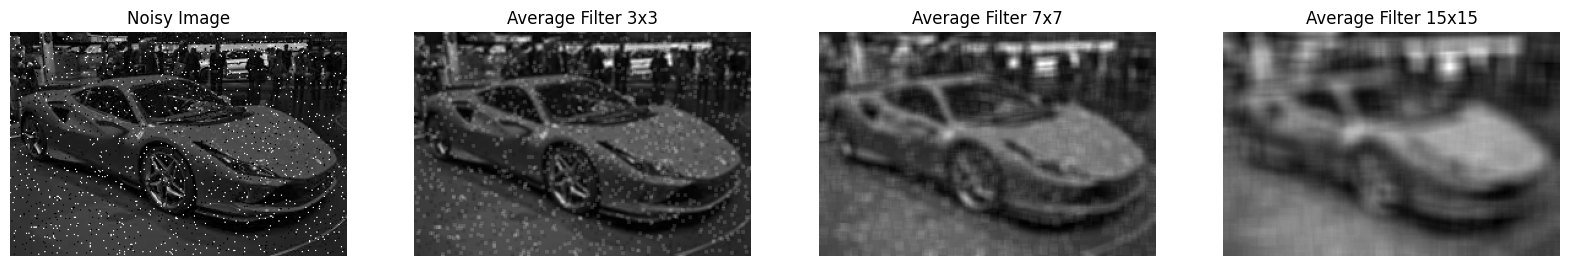

In [9]:
# Apply Average (Mean) filters with different kernel sizes
filtered_3x3 = cv2.blur(salt_pepper_noisy_image, (3, 3))
filtered_7x7 = cv2.blur(salt_pepper_noisy_image, (7, 7))
filtered_15x15 = cv2.blur(salt_pepper_noisy_image, (15, 15))

# Display images
fig, ax = plt.subplots(1, 4, figsize=(20, 5))

ax[0].imshow(salt_pepper_noisy_image, cmap='gray')
ax[0].set_title('Noisy Image')
ax[0].axis('off')

ax[1].imshow(filtered_3x3, cmap='gray')
ax[1].set_title('Average Filter 3x3')
ax[1].axis('off')

ax[2].imshow(filtered_7x7, cmap='gray')
ax[2].set_title('Average Filter 7x7')
ax[2].axis('off')

ax[3].imshow(filtered_15x15, cmap='gray')
ax[3].set_title('Average Filter 15x15')
ax[3].axis('off')

plt.show()


#### Median filter

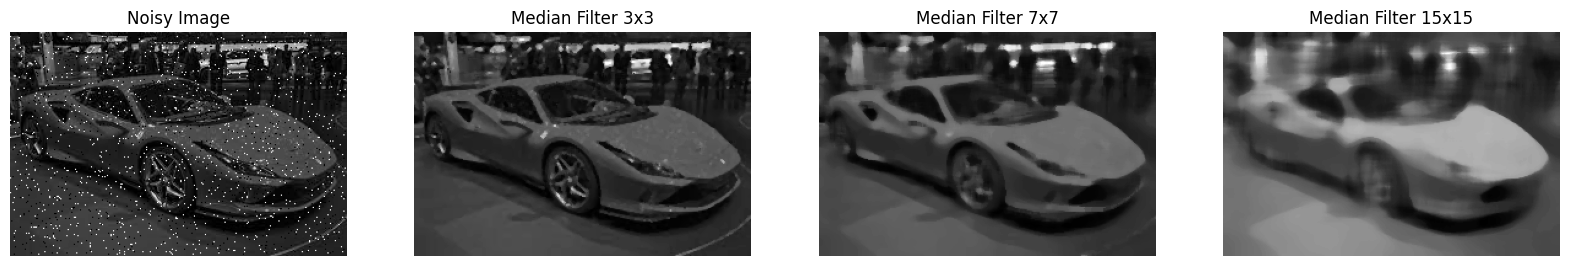

In [11]:
# Apply Median Filters with different kernel sizes
filtered_median_3x3 = cv2.medianBlur(salt_pepper_noisy_image, 3)
filtered_median_7x7 = cv2.medianBlur(salt_pepper_noisy_image, 7)
filtered_median_15x15 = cv2.medianBlur(salt_pepper_noisy_image, 15)

# Display images
fig, ax = plt.subplots(1, 4, figsize=(20, 5))

ax[0].imshow(salt_pepper_noisy_image, cmap='gray')
ax[0].set_title('Noisy Image')
ax[0].axis('off')

ax[1].imshow(filtered_median_3x3, cmap='gray')
ax[1].set_title('Median Filter 3x3')
ax[1].axis('off')

ax[2].imshow(filtered_median_7x7, cmap='gray')
ax[2].set_title('Median Filter 7x7')
ax[2].axis('off')

ax[3].imshow(filtered_median_15x15, cmap='gray')
ax[3].set_title('Median Filter 15x15')
ax[3].axis('off')

plt.show()

#### Adaptive Median filter

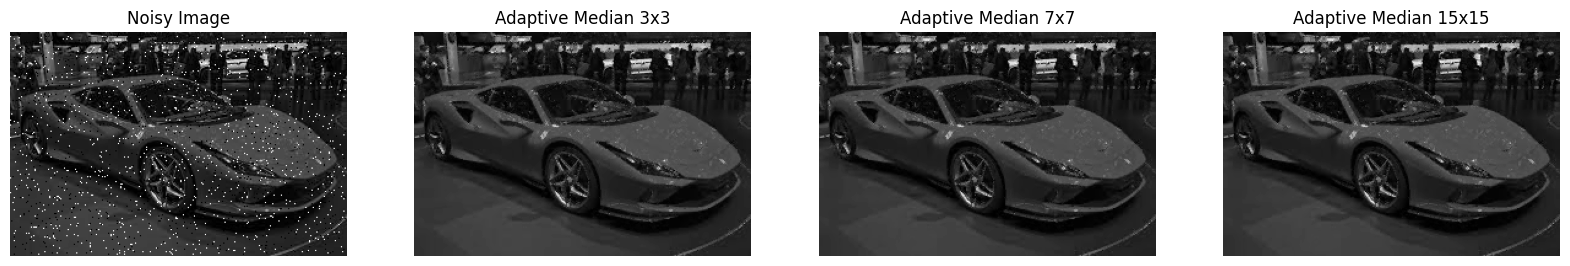

In [12]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def adaptive_median_filter(image, max_window_size=15):
    """
    Apply Adaptive Median Filter to an image.
    
    Parameters:
        image (numpy array): Grayscale input image.
        max_window_size (int): Maximum allowed window size (must be odd).
    
    Returns:
        numpy array: Filtered image.
    """
    padded_image = np.pad(image, max_window_size//2, mode='reflect')
    filtered_image = np.copy(image)
    
    rows, cols = image.shape
    
    for i in range(rows):
        for j in range(cols):
            window_size = 3  # Start with a small window
            
            while window_size <= max_window_size:
                x, y = i + max_window_size//2, j + max_window_size//2
                window = padded_image[x-window_size//2:x+window_size//2+1, y-window_size//2:y+window_size//2+1]
                
                min_val = np.min(window)
                max_val = np.max(window)
                med_val = np.median(window)
                curr_pixel = image[i, j]
                
                # Level A: Check if median is within min/max range
                if min_val < med_val < max_val:
                    # Level B: Check if current pixel is noise
                    if min_val < curr_pixel < max_val:
                        filtered_image[i, j] = curr_pixel  # Keep original pixel
                    else:
                        filtered_image[i, j] = med_val  # Replace with median
                    break  # Stop expanding the window
                
                window_size += 2  # Increase window size if needed

            if window_size > max_window_size:
                filtered_image[i, j] = med_val  # Use median if max window reached

    return filtered_image


# Apply Adaptive Median Filter with different maximum window sizes
filtered_adaptive_3x3 = adaptive_median_filter(salt_pepper_noisy_image, max_window_size=3)
filtered_adaptive_7x7 = adaptive_median_filter(salt_pepper_noisy_image, max_window_size=7)
filtered_adaptive_15x15 = adaptive_median_filter(salt_pepper_noisy_image, max_window_size=15)

# Display images
fig, ax = plt.subplots(1, 4, figsize=(20, 5))

ax[0].imshow(salt_pepper_noisy_image, cmap='gray')
ax[0].set_title('Noisy Image')
ax[0].axis('off')

ax[1].imshow(filtered_adaptive_3x3, cmap='gray')
ax[1].set_title('Adaptive Median 3x3')
ax[1].axis('off')

ax[2].imshow(filtered_adaptive_7x7, cmap='gray')
ax[2].set_title('Adaptive Median 7x7')
ax[2].axis('off')

ax[3].imshow(filtered_adaptive_15x15, cmap='gray')
ax[3].set_title('Adaptive Median 15x15')
ax[3].axis('off')

plt.show()
